In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels as sm
import pandas_datareader as pdr
import seaborn as sns
import statsmodels.tsa.stattools as st
import statsmodels as sm
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import acf, pacf, graphics
sns.mpl.rc('figure',figsize=(16, 6))

In [2]:
logreturn = pd.read_table(r'C:\Users\zoe_x\Documents\python\Tsay3 data\m-ew6299.txt',header=None)

In [3]:
import datetime

In [4]:
date = pd.date_range('1962-1', '1999-12', freq='MS')

In [5]:
date

DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1999-03-01', '1999-04-01', '1999-05-01', '1999-06-01',
               '1999-07-01', '1999-08-01', '1999-09-01', '1999-10-01',
               '1999-11-01', '1999-12-01'],
              dtype='datetime64[ns]', length=456, freq='MS')

In [6]:
logreturn.index = date

In [7]:
logreturn.index.name='date'

In [8]:
logreturn.columns = ['logreturn']

In [9]:
logreturn.head()

,logreturn
date,
1962-01-01,-0.792
1962-02-01,1.532
1962-03-01,-0.596
1962-04-01,-7.049
1962-05-01,-10.319


In [10]:
from statsmodels.graphics.tsaplots import plot_acf 
from statsmodels.graphics.tsaplots import plot_pacf 

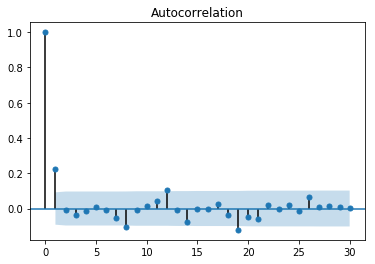

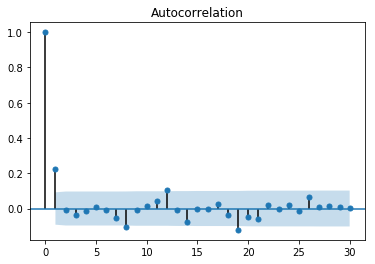

In [11]:
plot_acf(logreturn,lags=30)

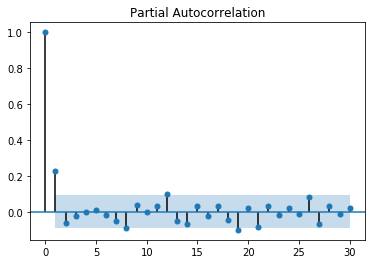

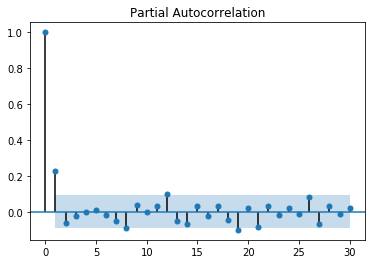

In [12]:
plot_pacf(logreturn, lags=30)

In [13]:
# 根据pacf和acf的图形认为，应当选择AR（1）和MA（1）的模型

# （a）构建AR模型并检验拟合模型

In [14]:
model_ar = AR(logreturn).fit(method='cmle',ic='aic')

In [15]:
# 下面是拟合的结果：

In [16]:
model_ar.params #拟合系数

const           0.826361
L1.logreturn    0.227095
dtype: float64

In [17]:
model_ar.k_ar #表示拟合的是AR（1）

1

In [18]:
model_ar.pvalues #p值

const           1.523089e-03
L1.logreturn    7.223491e-07
dtype: float64

In [19]:
import math

In [20]:
math.sqrt(model_ar.sigma2) #残差标准差

5.453498555001681

In [21]:
model_ar.bse #拟合系数的标准差

const           0.260661
L1.logreturn    0.045829
dtype: float64

In [22]:
#下面进行模型的检测

In [23]:
from statsmodels.stats.diagnostic import acorr_ljungbox

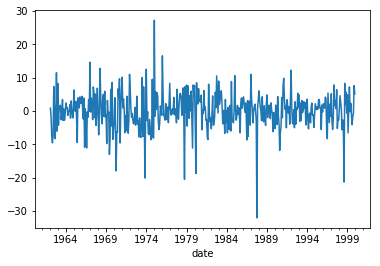

In [24]:
model_ar.resid.plot()

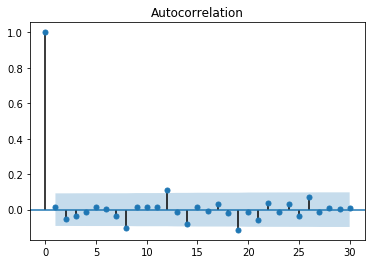

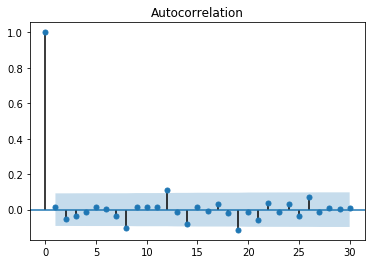

In [25]:
plot_acf(model_ar.resid,lags=30)

In [26]:
acorr_ljungbox(model_ar.resid,[12,13]) 

(array([13.92215607, 14.0222689 ]), array([0.30570687, 0.37227756]))

In [27]:
# 通过上述对残差进行作图、和LB检验，认为残差序列应为白噪声序列，模型是充分的

# （b）构建MA模型，并且检验拟合模型

In [28]:
model_ma = ARIMA(logreturn, order=(0,0,1)).fit(dsp=-1)

In [29]:
model_ma.summary() #拟合结果如下

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              logreturn   No. Observations:                  456
Model:                     ARMA(0, 1)   Log Likelihood               -1419.365
Method:                       css-mle   S.D. of innovations              5.439
Date:                Wed, 01 Apr 2020   AIC                           2844.730
Time:                        17:20:31   BIC                           2857.098
Sample:                    01-01-1962   HQIC                          2849.602
                         - 12-01-1999                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.0611      0.315      3.365      0.001       0.443       1.679
ma.L1.logreturn     0.2385      0.045      5.308      0.000       0.150       0.327
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -4.1936           +0.0000j            4.1936            0.5000
-----------------------------------------------------------------------------
"""

In [30]:
# 下面对模型进行检测

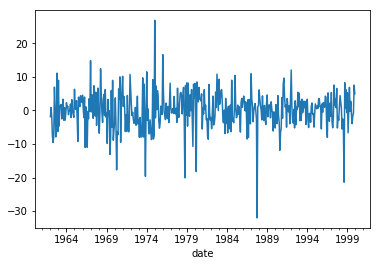

In [31]:
model_ma.resid.plot()

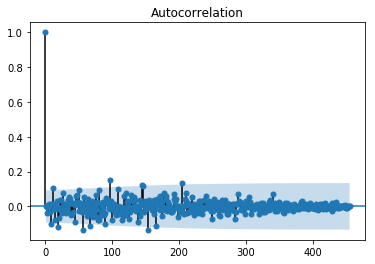

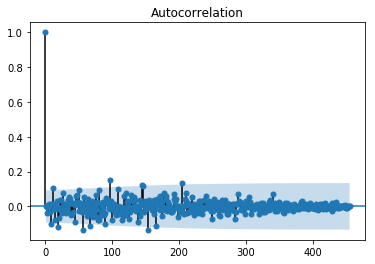

In [32]:
plot_acf(model_ma.resid)

In [33]:
acorr_ljungbox(model_ma.resid,[12,13])

(array([11.61400163, 11.69061759]), array([0.47715594, 0.55316173]))

In [34]:
# 根据上面对于残差序列的检验，认为其应当是白噪声序列，模型是充分的

# （c）计算AR（1）和MA（1）模型各自的1-2向前预测

In [35]:
model_ar.predict('2000-01-01','2000-02-01') #预测结果如下

2000-01-01    2.609738
2000-02-01    1.419019
Freq: MS, dtype: float64

In [36]:
model_ma.forecast(2) #预测结果如下，前两个array分别是预测系数和标准差

(array([2.25064382, 1.06108513]),
 array([5.43924486, 5.59174878]),
 array([[-8.41008021, 12.91136785],
        [-9.89854109, 12.02071135]]))

# （d）比较拟合模型AR（1）和MA（1）

In [37]:
# 根据拟合结果，AR（1）模型可以写成：r_t = 0.826+0.227r_{t-1}+a_t, 

In [38]:
# 将r_{t-1}再反复进行迭代，可以得到r_t = 1.069+a_t+0.227a_{t-1}+0.052a_{t-2}+0.012a_{t-3}+...

In [39]:
# 而MA（1）的拟合结果是：r_t = 1.061+a_t+0.239a_{t-1}, 和上面的结果前几项非常接近。